<a href="https://colab.research.google.com/github/AnIsAsPe/RNN-Resumenes-de-Texto/blob/main/Notebooks/Introducci%C3%B3n_a_TensorFlow_Perceptron_Clasificaci%C3%B3n_de_Im%C3%A1genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lectura de bibliotecas y Datos

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [4]:
datos = pd.read_csv('/content/drive/MyDrive/Datos/img_cancer_26x26pixeles_con_etiqueta.csv')

print(datos.shape)
datos.head()

(5063, 677)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,clase
0,0.083223,0.083223,0.083223,0.083225,0.083405,0.086613,0.094121,0.095760,0.095939,0.095679,0.095800,0.096059,0.095816,0.097095,0.099579,0.104371,0.121509,0.151148,0.166485,0.142229,0.100965,0.084538,0.083237,0.083223,0.083223,0.083223,0.083223,0.083223,0.083240,0.084179,0.092702,0.113767,0.125615,0.128518,0.128971,0.129441,0.130263,0.130819,0.130473,0.130028,...,0.188656,0.188316,0.192373,0.195840,0.194437,0.196929,0.193218,0.175780,0.128152,0.089850,0.083352,0.083223,0.083223,0.083223,0.083223,0.083223,0.083259,0.085485,0.109178,0.145949,0.147400,0.147373,0.153215,0.136331,0.128650,0.127448,0.124526,0.123044,0.123262,0.126940,0.126231,0.126898,0.121795,0.099420,0.084719,0.083252,0.083223,0.083223,0.083223,0
1,0.083223,0.083223,0.083223,0.083241,0.084892,0.112470,0.192035,0.219843,0.187999,0.180500,0.186738,0.186549,0.189735,0.188186,0.190577,0.193022,0.192217,0.186904,0.186196,0.171629,0.112510,0.085044,0.083240,0.083223,0.083223,0.083223,0.083223,0.083223,0.083305,0.089308,0.159444,0.323082,0.435133,0.479868,0.425607,0.406373,0.416591,0.418254,0.416060,0.420284,...,0.350737,0.328330,0.313045,0.315160,0.312431,0.316695,0.318328,0.278893,0.166274,0.092502,0.083354,0.083223,0.083223,0.083223,0.083223,0.083223,0.083301,0.089128,0.159247,0.262119,0.234541,0.216824,0.201565,0.194039,0.190225,0.190590,0.191628,0.185784,0.175968,0.180713,0.180095,0.184120,0.171356,0.119763,0.086424,0.083276,0.083223,0.083223,0.083223,0
2,0.083223,0.083223,0.083223,0.083240,0.084891,0.108390,0.155804,0.162704,0.179060,0.174836,0.160696,0.163860,0.181359,0.174879,0.160358,0.162727,0.175161,0.189507,0.215191,0.226223,0.136367,0.086611,0.083256,0.083223,0.083223,0.083223,0.083223,0.083223,0.083272,0.087915,0.154537,0.309475,0.352005,0.328503,0.358213,0.373566,0.346785,0.339945,0.390837,0.392600,...,0.332288,0.331581,0.343050,0.345295,0.330323,0.323152,0.320105,0.279885,0.169279,0.092595,0.083367,0.083223,0.083223,0.083223,0.083223,0.083223,0.083344,0.091139,0.171438,0.296291,0.282717,0.251271,0.217253,0.197555,0.193422,0.184207,0.180436,0.170264,0.177799,0.194378,0.195019,0.178956,0.169096,0.118785,0.086534,0.083280,0.083223,0.083223,0.083223,0
3,0.083223,0.083223,0.083223,0.083241,0.084968,0.108683,0.163460,0.192673,0.178441,0.165327,0.172069,0.186495,0.178956,0.167983,0.162857,0.169700,0.184739,0.207286,0.224597,0.247589,0.140882,0.086850,0.083257,0.083223,0.083223,0.083223,0.083223,0.083223,0.083273,0.088753,0.156897,0.300279,0.347244,0.385530,0.391457,0.352362,0.352138,0.404086,0.410804,0.362560,...,0.364815,0.359175,0.341390,0.352469,0.337021,0.346255,0.342502,0.302029,0.177949,0.093565,0.083382,0.083223,0.083223,0.083223,0.083223,0.083223,0.083307,0.089709,0.165956,0.278964,0.248794,0.222636,0.206214,0.199162,0.194352,0.190506,0.195654,0.206230,0.195324,0.191298,0.182867,0.184448,0.180449,0.122997,0.086934,0.083285,0.083223,0.083223,0.083223,0
4,0.083223,0.083223,0.083223,0.083243,0.085150,0.125502,0.223968,0.188510,0.181894,0.181329,0.172335,0.169007,0.173832,0.184832,0.188771,0.204627,0.220360,0.238141,0.270100,0.229637,0.128614,0.086290,0.083253,0.083223,0.083223,0.083223,0.083223,0.083223,0.083290,0.089593,0.165005,0.366662,0.548632,0.433108,0.428869,0.439226,0.422466,0.382484,0.364961,0.389379,...,0.356768,0.350259,0.345512,0.349427,0.360185,0.365872,0.349878,0.325673,0.188289,0.094558,0.083407,0.083223,0.083223,0.083223,0.083223,0.083223,0.083289,0.087291,0.130107,0.201024,0.221397,0.227356,0.207675,0.190300,0.199108,0.204295,0.192606,0.190277,0.187772,0.186235,0.187462,0.198557,0.191787,0.125617,0.087338,0.083290,0.083223,0.083223,0.083223,0


In [5]:
X = datos.drop('clase', axis=1)
Y = datos['clase']

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, 
                                                    shuffle=True, random_state=0)

# 1. Construcción del modelo 

* [Guia TF del Modelo secuencial](https://www.tensorflow.org/guide/keras/sequential_model)
* [Funciones de activación ](https://keras.io/api/layers/activations/)

El codigo para entrenar un perceptron simple usando TensorFlow/Keras, que ha sido diseñado principalmente para arquitecturas de redes neuronales profundas con diferentes funciones de activación que resultan en gradientes diferentes de cero,  la funcion de activación original del perceptron (que es una función  no continua en el cero), se remplaza por hard sigmoid.

In [16]:
model = tf.keras.models.Sequential([               

  tf.keras.layers.Dense(1,                                    # dimension de la salida
                        input_shape = (676,),                 # dimensiones de la entrada       
                        activation='hard_sigmoid',            # en tf/keras para perceptrón    
                        kernel_initializer ='glorot_uniform'  # para inicializar pesos de forma aleatoria y que no sean ceros
                         )

  #Dropout previene el sobreajuste del modelo haciendo 0 un porcentaje de las entradas.
  #tf.keras.layers.Dropout(0.2),  

])


En el parámetro  `kernel_initializer ` se establece 'glorot_uniform' ya que el entrenamiento será con stochastic gradient descent (en lugar del la regla de aprendizaje del perceptron) por lo que es necesario inicializar los pesos con pesos aleatorios que no sean ceros.

In [17]:
#Regresa una lista de las capas del modelo
model.layers

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 677       
Total params: 677
Trainable params: 677
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.add(tf.keras.layers.Dense(3,
                                activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 677       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 6         
Total params: 683
Trainable params: 683
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.pop()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 677       
Total params: 677
Trainable params: 677
Non-trainable params: 0
_________________________________________________________________


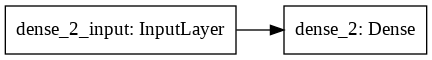

In [21]:
tf.keras.utils.plot_model( 
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="LR",
    dpi=96,
)

# Entrenamiento y validación del modelo

Compilar el modelo eligiendo un optimizador

In [22]:
model.compile(loss='binary_crossentropy',       # función objetivo  que se busca minimizar
                                                # https://keras.io/api/losses/
              
              optimizer='adam',                 # stochastic gradient descent
                                                # https://keras.io/api/optimizers/adam/
              
              metrics=['accuracy'])             


In [23]:
history = model.fit(x_train, y_train,    
                    epochs=60,                 
                    batch_size=250,       
                    verbose = 2,       
                    validation_data = (x_test, y_test))

Epoch 1/60
15/15 - 1s - loss: 0.7305 - accuracy: 0.5384 - val_loss: 0.6374 - val_accuracy: 0.7196
Epoch 2/60
15/15 - 0s - loss: 0.6314 - accuracy: 0.7051 - val_loss: 0.6074 - val_accuracy: 0.7182
Epoch 3/60
15/15 - 0s - loss: 0.6195 - accuracy: 0.7017 - val_loss: 0.5901 - val_accuracy: 0.7189
Epoch 4/60
15/15 - 0s - loss: 0.6026 - accuracy: 0.7057 - val_loss: 0.5823 - val_accuracy: 0.7196
Epoch 5/60
15/15 - 0s - loss: 0.5944 - accuracy: 0.7054 - val_loss: 0.5769 - val_accuracy: 0.7196
Epoch 6/60
15/15 - 0s - loss: 0.5883 - accuracy: 0.7057 - val_loss: 0.5712 - val_accuracy: 0.7196
Epoch 7/60
15/15 - 0s - loss: 0.5837 - accuracy: 0.7057 - val_loss: 0.5667 - val_accuracy: 0.7189
Epoch 8/60
15/15 - 0s - loss: 0.5789 - accuracy: 0.7057 - val_loss: 0.5616 - val_accuracy: 0.7196
Epoch 9/60
15/15 - 0s - loss: 0.5746 - accuracy: 0.7057 - val_loss: 0.5573 - val_accuracy: 0.7189
Epoch 10/60
15/15 - 0s - loss: 0.5699 - accuracy: 0.7057 - val_loss: 0.5535 - val_accuracy: 0.7189
Epoch 11/60
15/15 -

In [24]:
score = model.evaluate(x_test,  y_test, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

48/48 - 0s - loss: 0.5233 - accuracy: 0.7512
Test loss: 0.5233256220817566
Test accuracy: 0.7511520981788635


Referencias: 
1. Training the Perceptron with Scikit-Learn and TensorFlow | QuantStart [Internet]. [citado 19 de julio de 2021]. Disponible en: https://www.quantstart.com/articles/training-the-perceptron-with-scikit-learn-and-tensorflow/
